In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler #to scale the model 
from sklearn.cluster import KMeans # to train model

from sklearn.metrics import silhouette_score 

In [2]:
df = pd.read_csv("Cricket.csv", encoding='latin1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [5]:
# EXPLORATORY DATA ANALYSIS
# first we will convert 'span' column into 'experience' where it will tell number of years instead of start and stop year.
df[['span_start', 'span_stop']] = df.Span.str.split('-', expand = True)
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,span_start,span_stop
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [6]:
df.span_start = df.span_start.astype('int')
df.span_stop = df.span_stop.astype('int')
df['experience'] =df['span_stop'] - df['span_start']
df.drop(['Player', 'Span', 'span_start', 'span_stop'], axis = 1, inplace = True)


In [7]:
df.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [8]:
df.HS.unique() # here we need to remove * from the values.

array(['200*', '169', '164', '189', '144', '137*', '139', '183', '153',
       '161*', '141*', '172', '183*', '153*', '162*', '145', '215', '194',
       '150', '152*', '132*', '173', '219', '175', '124', '134*', '130',
       '120*', '131*', '119*', '159', '102', '145*', '141', '108*',
       '188*', '143', '189*', '142*', '139*', '127*', '122', '174*',
       '181*', '166', '121', '140*', '124*', '113*', '185*', '154',
       '116*', '112', '237*', '109*', '264', '119', '144*', '150*',
       '133*', '96*', '156'], dtype=object)

In [9]:
'asd*'.split('*')[0]

'asd'

In [10]:
df.HS = df.HS.astype('str')
df.HS = df.HS.map(lambda x : x.split('*')[0])
df.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,experience
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [11]:
df.isna().sum() # checking for null values.

Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
BF            0
SR            0
100           0
50            0
0             0
experience    0
dtype: int64

In [12]:
df.duplicated().sum() #checking for duplicate rows

0

C:\Users\RAJESH\AppData\Local\Temp\ipykernel_10664\281363411.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


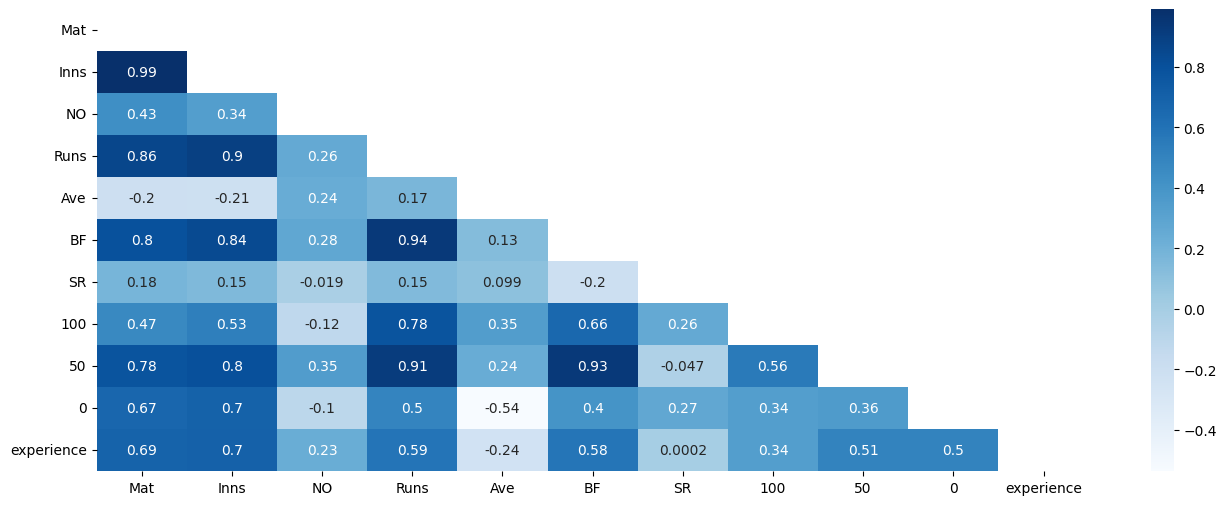

In [13]:
# /correlation

df_corr = df.corr()
plt.subplots(figsize = (16, 6))
mask  = np.triu(np.ones_like(df_corr, dtype = 'bool'))
sns.heatmap(df_corr, mask = mask, annot = True, cmap = 'Blues')
plt.show()

<AxesSubplot: >

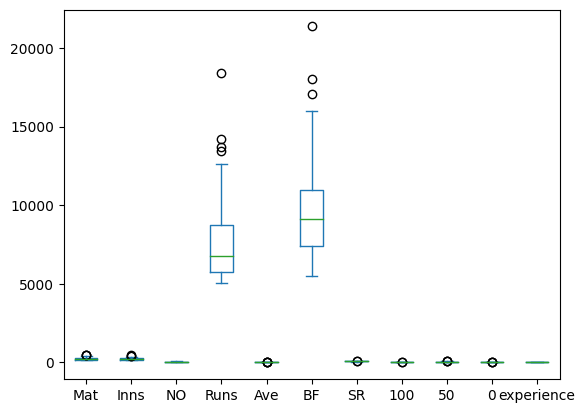

In [14]:
df.plot(kind = 'box')

In [15]:
# scaling the data

df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [16]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.587674,-1.481860,-1.188961,-0.979677,-0.522838,1.106299,-0.559768,-1.457604,-0.069268,-0.950465,-1.741328,0.684919
75,-1.126598,-1.167010,0.067133,-0.984410,-1.713068,0.829159,-0.863213,-0.562275,-1.437319,-0.273453,-1.231828,-0.227024
76,-0.651961,-0.709047,0.485831,-0.996241,-0.941027,-0.537836,-0.967512,-0.234765,-0.815478,-1.258197,-1.061995,-1.138967
77,-0.638400,-0.995274,0.206699,-0.997819,0.217035,0.208570,-1.317278,1.332823,-0.691110,-1.012011,0.296671,-0.834986


c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

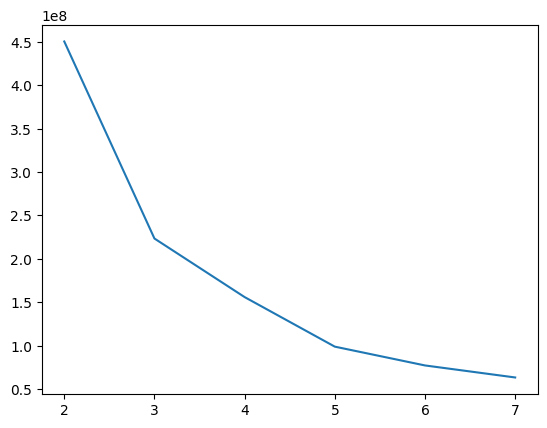

In [17]:
# elbow curve to select number of clusters

clusters=list(range(2,8))
ssd = []  #wcss
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

from the above elbow graph we can see that there is a bend at x = 3, 4 respectively. but we can reject x=3 as the y(sum of error) is higher than the y for x = 4. so, we k(select number of clusters) as 4.

## silhoutte score
    another way for finding optimal 'k' value
    this method is better than elbow graph

    range of silhoutte score = -1, +1
    where, 
        -1 -> worst
        +1 -> best
        values near 0 -> overlap of clusters

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

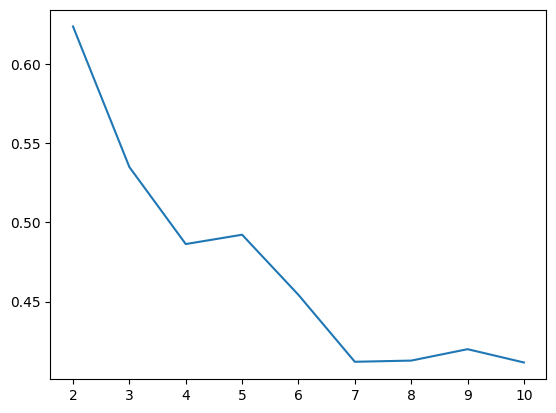

In [18]:
silhouette_avg = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=1)
    km.fit(df)
    cluster_label = km.labels_
    silhouette_avg.append(silhouette_score(df, cluster_label))

plt.plot(range(2, 11), silhouette_avg)
plt.show()

In [19]:
# training the k-means cluster model

cluster = KMeans(n_clusters=4, random_state=15)
cluster.fit(df_scaled)

c:\Users\RAJESH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=15)

In [20]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 0, 0, 2, 0, 3, 2, 3,
       0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
cluster.labels_ #contains the cluster category for each players

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 0, 0, 2, 0, 3, 2, 3,
       0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
cluster.cluster_centers_ #contains the center for each of the cluster

array([[-0.65958913, -0.67818776, -0.15530025, -0.73583162, -0.65452717,
        -0.14699303, -0.64703202, -0.31138222, -0.56674153, -0.64273236,
        -0.49942242, -0.61649962],
       [ 1.94422936,  1.99580144,  0.59438214,  2.16689307,  0.48153025,
         0.22519495,  2.18622171, -0.06701   ,  1.49224444,  2.2020833 ,
         1.20244759,  1.15777888],
       [-0.44934278, -0.39840582, -0.71279439, -0.08721134,  1.322113  ,
         0.48571001, -0.36538598,  0.80407071,  0.55988877, -0.37120372,
         0.01694538, -0.38795501],
       [ 0.53560073,  0.50060449,  0.55893682,  0.26319843, -0.27927733,
        -0.26571656,  0.34479005, -0.14770861, -0.22917048,  0.33614995,
         0.23197227,  0.75729586]])

In [23]:
predict = cluster.predict(df_scaled)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 0, 0, 2, 0, 3, 2, 3,
       0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
df['cluster'] = predict

(<Figure size 1500x700 with 1 Axes>, <AxesSubplot: >)

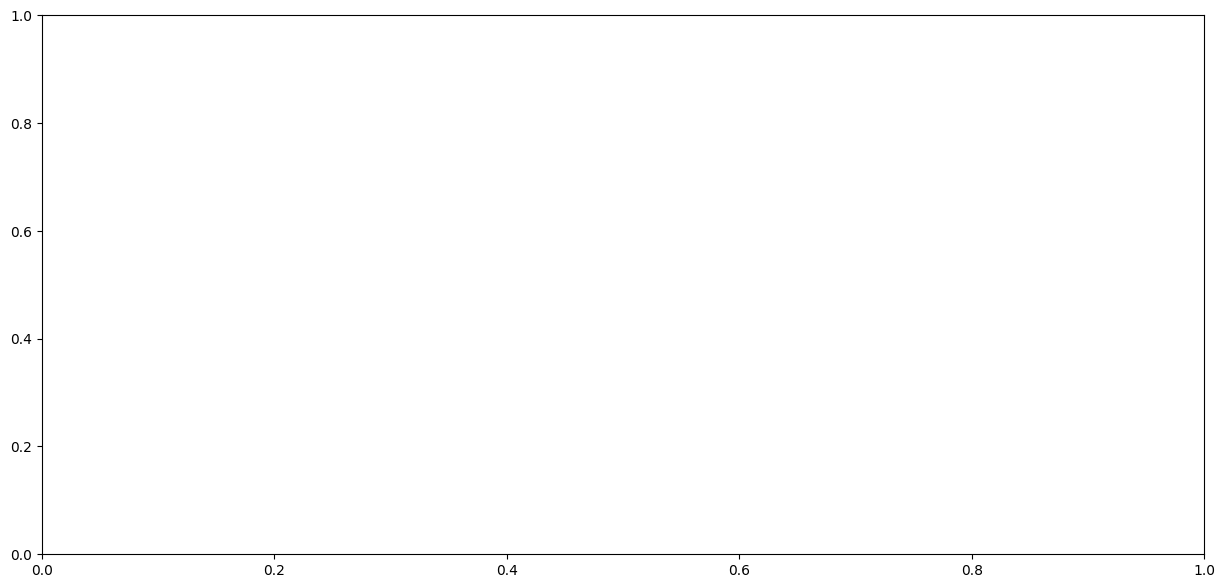

In [25]:
# visualising the clusters

plt.subplots(figsize = (15, 7))
